# Using Booli api for finding a apartment to buy in Stockholm

In [110]:
%matplotlib inline
import numpy as np
import requests

import sys
import os

import matplotlib.pyplot as plt

## Autentisering

Alla anrop autentiseras genom parametrarna callerId, time, unique och hash som skickas med i frågan. Ett exempel på hur en fråga till API:et kan se ut visas här:

```
https://api.booli.se/listings?q=nacka&limit=3&offset=0&callerId=[callerId]&time=1323793365&unique=3116053465361547264&hash=a053d19fcced8e180df1a40b3fc95b6560eee1af
```

**callerId** är det namn du angav då du registrerade dig.

**time** är en UNIX timestamp.

**unique** är en 16 tecken lång sträng som slumpgenereras för varje förfrågan, t.ex. ”f4508htyuk98fe4f”.

**hash** är en sha1hash sha1(callerId + time + key + unique) som en 40-char hexadecimal, t.ex. ”6b76a4ede12897d42dabc2a5f9270bbdb76985af”, där key är den privata nyckel du tilldelats.

In [35]:
"""
/listings?q=vasastan - listings of the query
/sold?q=vasastan - sold listings of the query
/areas?q=vasastan - areas, gives the surroinds areas of the area
"""

open_listings_query = "/listings"
sold_listings_query = "/sold?q=vasastan"
booli_api_url = "https://api.booli.se"

In [75]:
import string
import random
import time
import hashlib

# generate a 40 hexadecimal based on callerid, time, key, unique
def sha1_generator():
    sha_hash = hashlib.sha1(callerId + timestamp + key + unique)
    return sha_hash.hexdigest()

callerId = os.environ['BOOLI_CALLERID']
key = os.environ['BOOLI_KEY']
timestamp = str(int(time.time()))
unique = ''.join(random.choice(string.ascii_uppercase + string.digits) for x in range(16))
hashstr = sha1_generator()

In [126]:
params = { 'q' : 'vasastan', 'callerId' : callerId, 'time' : timestamp, 'unique' : unique, 'hash' : hashstr}

## Paginering

För att minska mängden information som skickas vid varje svar finns en system för paginering. Följande attribut skickas med som hjälp:

```
{
  "count": 23, // Antalet som skickades
  "totalCount": 48, // Det totala antalet som finns tillgängligt på servern
  "offset":   25,  // Från vilket position resultaten ska hämtas
  "limit":  25,  // Max antal som skickas tillbaka från servern
}
```

Det vanliga är att första frågan har offset=0 samt limit satt till något som passar applikationen, den får dock inte överstiga 500 som är högsta tillåtna gräns. För att sedan hämta efterföljande bostadsannonser i nästa fråga så sätter man offset till det värde man har på limit och lämnar limit orörd. count och totalCount finns med som stöd vid presentation.

In [127]:
params['offset'] = 0
params['limit'] = 30

params['rooms'] = '2'
params

{'callerId': 'ericsapi',
 'hash': 'cb1f60a5c4aac76926f9947057c98e58a894425a',
 'limit': 20,
 'offset': 20,
 'q': 'vasastan',
 'rooms': '2',
 'time': '1486161050',
 'unique': 'TLNLPY14IIEK8KA7'}

In [128]:
open_listings_response = requests.get(booli_api_url + open_listings_query,params=params)

In [129]:
open_listings_response.json()

{u'count': 20,
 u'limit': 20,
 u'listings': [{u'booliId': 2252731,
   u'constructionYear': 1927,
   u'floor': 5,
   u'listPrice': 5650000,
   u'livingArea': 63,
   u'location': {u'address': {u'streetAddress': u'Br\xe5vallagatan 9B'},
    u'namedAreas': [u'Birkastan Vasastan'],
    u'position': {u'latitude': 59.33902016, u'longitude': 18.03467858},
    u'region': {u'countyName': u'Stockholms l\xe4n',
     u'municipalityName': u'Stockholm'}},
   u'objectType': u'L\xe4genhet',
   u'published': u'2017-02-03 17:08:26',
   u'rent': 2943,
   u'rooms': 2.5,
   u'source': {u'id': 1610,
    u'name': u'HusmanHagberg',
    u'type': u'Broker',
    u'url': u'http://www.husmanhagberg.se/'},
   u'url': u'https://www.booli.se/annons/2252731'},
  {u'booliId': 2252725,
   u'constructionYear': 1974,
   u'floor': 3,
   u'listPrice': 4495000,
   u'livingArea': 55.4,
   u'location': {u'address': {u'streetAddress': u'Roslagsgatan 28'},
    u'namedAreas': [u'Vasastan'],
    u'position': {u'latitude': 59.347295

In [131]:
counter = 0
listPrices = []
for i in open_listings_response.json()['listings']:
    if (i['listPrice'] > 3000000) & (i['listPrice'] < 5000000) & (i['livingArea'] > 40.0) & (i['livingArea'] < 65) & (i['rent'] < 3500):
        counter += 1
        print(counter)
        listPrices.append(i['listPrice'])
        print(i)

1
{u'booliId': 2252725, u'livingArea': 55.4, u'floor': 3, u'url': u'https://www.booli.se/annons/2252725', u'constructionYear': 1974, u'rooms': 2, u'source': {u'url': u'http://www.fastighetsbyran.se/', u'type': u'Broker', u'id': 1573, u'name': u'Fastighetsbyr\xe5n'}, u'location': {u'position': {u'latitude': 59.34729572, u'longitude': 18.0594496}, u'region': {u'municipalityName': u'Stockholm', u'countyName': u'Stockholms l\xe4n'}, u'namedAreas': [u'Vasastan'], u'address': {u'streetAddress': u'Roslagsgatan 28'}}, u'published': u'2017-02-03 17:08:02', u'rent': 2087, u'listPrice': 4495000, u'objectType': u'L\xe4genhet'}
2
{u'booliId': 2252652, u'livingArea': 48, u'floor': 1, u'url': u'https://www.booli.se/annons/2252652', u'constructionYear': 1885, u'rooms': 2, u'source': {u'url': u'http://www.husmanhagberg.se/', u'type': u'Broker', u'id': 1610, u'name': u'HusmanHagberg'}, u'location': {u'position': {u'latitude': 59.34505653, u'longitude': 18.05714607}, u'region': {u'municipalityName': u'St

(array([ 2.,  3.,  2.,  2.,  5.,  0.,  3.,  0.,  1.,  2.]),
 array([ 3395000.,  3620500.,  3846000.,  4071500.,  4297000.,  4522500.,
         4748000.,  4973500.,  5199000.,  5424500.,  5650000.]),
 <a list of 10 Patch objects>)

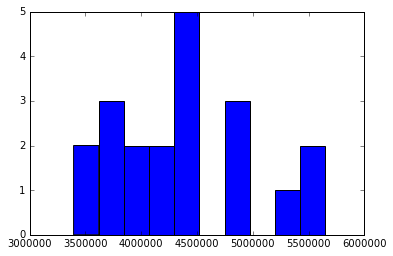

In [115]:
plt.hist(listPrices)